# Esercizio 10.1 - <span style="color:deeppink"> Traveling salesman problem w/ simulated annealing </span>

### Exercise 10.1

By adapting your Genetic Algorithm (GA) code, developed during the Numerical Exercise 9, write a C++ code to solve the TSP with a **Simulated Annealing** (SA) algorithm. Apply your code to the optimization of a path among 

- 32 cities randomly placed on a circumference
- 32 cities randomly placed inside a square

Show your results via:

- a picture of the length of the best path as a function of the iteration of your algorithm
- a picture of the best path

and compare your SA results with those obtained with GA in the previosu numerical exercise.

### Exercise 10.2

Parallelize with MPI libraries your Genetic Algorithm code in order to solve the TSP by performing a *Genetic Search* with 4 **parallel GA searches of the optimal path**:
each node should perform an independent GA search the so-called *Continents*, **but** every $N_{migr}$ generations the *Continents* should exchange their best individuals randomly.
Apply your code to the TSP problem for 32 cities randomly placed inside a square and try to estimate if your performances improve with *Continents*.

# Esercizio 10.1 - <span style="color:deeppink"> Traveling salesman problem w/ simulated annealing </span>

### Algoritmo 
L'algoritmo utilizza lo stesso codice scritto nell'esercizio 9 per costruire una popolazione e farla evolvere con l'obiettivo di minimizzare il cammino. La differenza rispetto all'algoritmo genetico è che in questo caso la popolazione è costituita da un solo individuo che subisce mutazioni. 
L'algoritmo simula a 14 temperature comprese nel range $(0.1 , 4)$. Per ogni temperatura di simulazione sono eseguite $10^6$ mosse. Una mossa consiste nel proporre una mutazione dell'inviduo, che viene automaticamente accettata se il suo fitness migliora, altrimenti la probabilità di accettazione è determinata da una distribuzione di Boltzmann $ p = e^{- \frac{fit_{new} - fit_{old}}{T}} $. Abbassando gradualmente la temperatura di simulazione, la probabilità di accettare mutazioni non buone si riduce sempre di più, quindi mi aspetto che il fitness del cromosoma diventi sempre migliore. 

Le mutazioni che il cromosoma può subire sono le stesse dell'esercizio 9 e avvengono con probabilità del $50\%$:
1. Uno scambio tra due geni selezionati in modo casuale 
2. Uno scambio tra due geni adiacenti
3. Lo shift di una parte di cromosoma
4. Una permutazione tra gruppi di dimensione casuale di città adiacenti
5. L'inversione dell'ordine di un numero casuale di città adiacenti

Rispetto all'esercizio 9, il fitness dei cammini è stato calcolato utilizzando una norma $L^{(2)}$. Questo non comporta differenze nell'ottimizzazione, risulteranno semplicemente riscalate le lunghezze dei cammini.

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

In [2]:
#loading cities' positions
x_circle , y_circle =  np.loadtxt( "10.1/pos_circle.csv" , dtype=float , delimiter = ",", usecols=(0,1) , unpack= True)
x_square , y_square =  np.loadtxt( "10.1/pos_square.csv" , dtype=float , delimiter = ",", usecols=(0,1) , unpack= True)

In [3]:
#Riaggiungo la prima città in coda per far sì che il cammino si chiuda
x_circle = np.append( x_circle , x_circle[0])
y_circle = np.append( y_circle , y_circle[0])
x_square = np.append( x_square , x_square[0])
y_square = np.append( y_square , y_square[0])

In [4]:
#Carico i file contenenti i cammini ottimizzati
best_path_circle = np.loadtxt( "10.1/best_path_circle.txt" , dtype=int , delimiter = ",", usecols=(0) , unpack= True)
best_path_square = np.loadtxt( "10.1/best_path_square.txt" , dtype=int , delimiter = ",", usecols=(0) , unpack= True)

In [5]:
#temperature di simulazione
temperatures = [ 4. , 3.5 , 3. , 2.5 , 2. , 1.5 , 1.25 , 1. , 0.75 , 0.5 , 0.4 , 0.3, 0.2 , 0.1 ]
colors = ['red', 'orangered', 'coral', 'orange', 'gold', 'yellow', 'greenyellow', 'limegreen', 'mediumspringgreen', 'aquamarine', 'lightskyblue', 'dodgerblue', 'blue', 'mediumblue']

## Part 1: <span style="color:indigo"> Cities disposed on a circle <span>

In [6]:
#Riordino le città secondo l'ordine contenuto nel miglior cammino
x_circle_ordered = x_circle[best_path_circle-1]
y_circle_ordered = y_circle[best_path_circle-1]

In [7]:
#Riaggiungo la prima città in coda per far sì che il cammino si chiuda
x_circle_ordered = np.append( x_circle_ordered , x_circle_ordered[0])
y_circle_ordered = np.append( y_circle_ordered , y_circle_ordered[0])

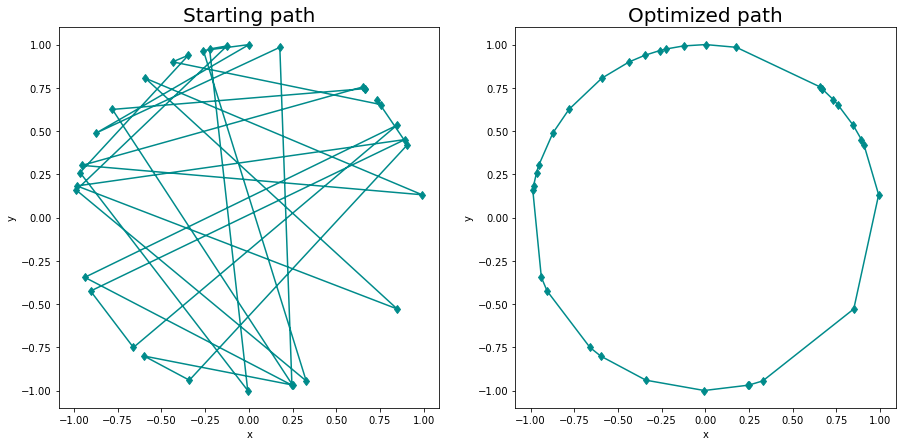

In [8]:
#Plotting picture of the best path
fig, ax = plt.subplots( 1 , 2 , figsize=(15 , 7))
ax[0].plot( x_circle , y_circle , marker = "d" , color = "Darkcyan")
ax[1].plot(x_circle_ordered , y_circle_ordered , marker="d" , color = "Darkcyan")

ax[0].set_title( "Starting path" , fontsize = 20)
ax[1].set_title( "Optimized path" , fontsize = 20)

for i in range(2):
    ax[i].set_xlabel("x")
    ax[i].set_ylabel("y")

    I grafici mettono a confronto il cammino iniziale e quello ottimizzato. È evidente l'ottimo funzionamento del codice, che riesce ad individuare in modo efficacie il cammino più breve sulla circonferenza.

In [9]:
#Carico i file contenenti l'evoluzione del costo del cammino diminuendo la temperatura di simulazione
cost_circle = np.loadtxt( "10.1/Circle.txt" , dtype = float , usecols=(0) , unpack = True)


Starting path length =  49.5502
Best path length =  3.03681 



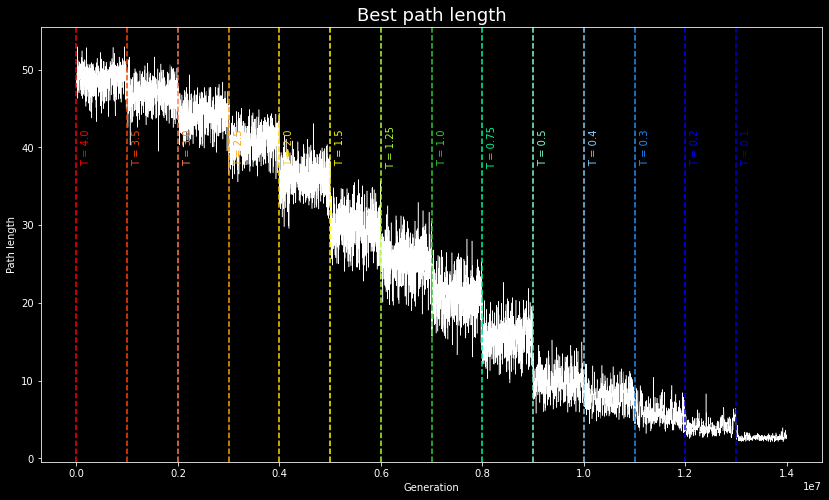

In [10]:
from matplotlib.pyplot import text

with plt.style.context('dark_background'):
    fig , ax = plt.subplots( 1 , 1 , figsize=( 14 , 8 ) )
    ax.plot(np.arange(len(cost_circle))*2000 , cost_circle , color = "white" , linewidth = 0.5 )
    ax.set_xlabel('Generation')
    ax.set_ylabel('Path length')
    ax.set_title('Best path length' , fontsize=18)

steps = 10**6 

for i in range(len(temperatures)):
    ax.axvline(i*steps, color=colors[i], linestyle='dashed')
    text(i*steps + 10**5, 40, "T = "+str(temperatures[i]), rotation=90, verticalalignment='center', color=colors[i])

print("\nStarting path length = ", cost_circle[0])
print("Best path length = ", cost_circle[-1], '\n')

    Il grafico mostra il costo del cammino in funzione degli step di simulazione eseguiti. Sono anche riportate le temperature di simulazione. Per ogni temperatura vengono eseguite 1 milione di mosse. Non ho calcolato la lunghezza del cammino dopo ogni mossa per evitare di produrre un file di 14 milioni di righe, il codice calcola una media del costo del cammino ogni 2000 mosse. Ho scelto questo approccio così da non "buttare via" molte configurazioni intermedie, cosa che accadrebbe stampando il costo del un singolo cromosoma ogni 2000 per esempio. 

## Part 2: <span style="color:indigo"> Cities inside a 1x1 square <span>

In [11]:
#Riordino le città secondo l'ordine contenuto nel miglior cammino
x_square_ordered = x_square[best_path_square-1]
y_square_ordered = y_square[best_path_square-1]

In [12]:
#Riaggiungo la prima città in coda per far sì che il cammino si chiuda
x_square_ordered = np.append( x_square_ordered , x_square_ordered[0])
y_square_ordered = np.append( y_square_ordered , y_square_ordered[0])

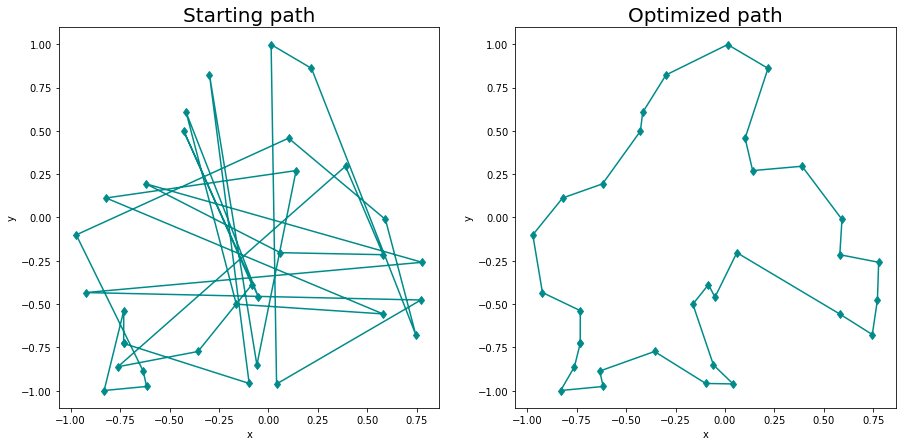

In [13]:
#Plotting picture of the best path
fig, ax = plt.subplots( 1 , 2 , figsize=(15 , 7))
ax[0].plot( x_square , y_square , marker = "d" , color ="darkcyan")
ax[1].plot (x_square_ordered , y_square_ordered , marker = "d" , color ="darkcyan")

ax[0].set_title( "Starting path" , fontsize = 20)
ax[1].set_title( "Optimized path" , fontsize = 20)

for i in range(2):
    ax[i].set_xlabel("x")
    ax[i].set_ylabel("y")

    I grafici mettono a confronto il cammino iniziale e quello ottimizzato. È evidente l'ottimo funzionamento del codice, che riesce ad individuare in modo efficacie il cammino più breve nel quadrato.

In [14]:
#Carico i file contenenti l'evoluzione del costo del cammino nelle generazioni.
cost_square = np.loadtxt( "10.1/Square.txt" , dtype = float , usecols=(0) , unpack = True)


Starting path length =  49.5502
Best path length =  3.03681 



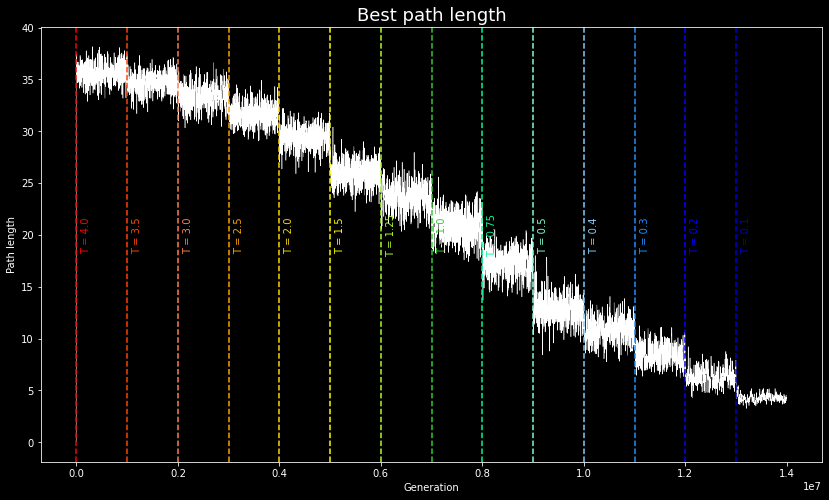

In [15]:
from matplotlib.pyplot import text

with plt.style.context('dark_background'):
    fig , ax = plt.subplots( 1 , 1 , figsize=( 14 , 8 ) )
    ax.plot(np.arange(len(cost_square))*2000 , cost_square , color = "white" , linewidth = 0.5 )
    ax.set_xlabel('Generation')
    ax.set_ylabel('Path length')
    ax.set_title('Best path length' , fontsize=18)

steps = 10**6 

for i in range(len(temperatures)):
    ax.axvline(i*steps, color=colors[i], linestyle='dashed')
    text(i*steps + 10**5, 20, "T = "+str(temperatures[i]), rotation=90, verticalalignment='center', color=colors[i])

print("\nStarting path length = ", cost_circle[0])
print("Best path length = ", cost_circle[-1], '\n')

    Il grafico mostra il costo del cammino in funzione degli step di simulazione eseguiti. Sono anche riportate le temperature di simulazione. Per ogni temperatura vengono eseguite 1 milione di mosse. Non ho calcolato la lunghezza del cammino dopo ogni mossa per evitare di produrre un file di 14 milioni di righe. Il codice invece calcola una media del costo del cammino ogni 2000 mosse. Ho scelto questo approccio così da non "buttare via" molte configurazioni intermedie, cosa che accadrebbe stampando il costo del un singolo cromosoma ogni 2000 passi per esempio. 

# Esercizio 10.2 - <span style="color:deeppink"> Parallelizing the genetic algorithm </span>

### Algoritmo

L'algoritmo genetico utilizzato è lo stesso dell'esercizio 9. Questa volta però viene eseguito in parallelo su 4 core, e periodicamente i core si scambiano i migliori cromosomi. Questo scambio di informazioni tra diversi continenti dovrebbe migliorare la performance.

Ogni continenente possiede una popolazione di 300 individui, che viene fatta evolvere per 1000 generazioni. Ogni 25 run, ogni nodo manda i suoi 10 migliori cromosomi agli altri processi e riceve 10 * n_cores cromosomi dagli altri. Questi cromosomi ricevuti sono sostituiti alla parte peggiore della popolazione.

Ovviamente tutti i nodi lavorano sulla stessa disposizione di città.

In [31]:
pos_x , pos_y =  np.loadtxt( "10.2/pos_square.csv" , dtype=float , delimiter = ",", usecols=(0,1) , unpack= True)
positions = np.empty( shape= (len(pos_x) , 2 ))
positions[: , 0] = pos_x
positions[: , 1] = pos_y

colori = ['indigo' , 'orange' , 'teal' ,  'limegreen' , 'purple' ]

Best path length for core 0 = 7.72504
Best path length for core 1 = 7.72504
Best path length for core 2 = 7.72504
Best path length for core 3 = 7.72504
Best path length for single core = 7.72504


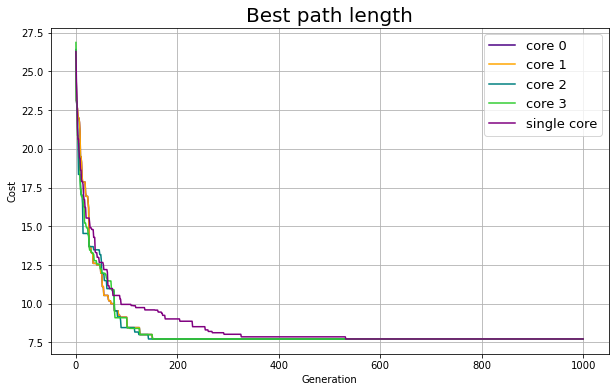

In [32]:
# plot evolution of length of the best path (fitness of the first cromo in the ordered population) 
#   as a function of #generations computed

cores = [0, 1, 2, 3, 4]    # core = 4 is for the single core run

fig, ax = plt.subplots(1, 1, figsize=(10,6))
for core in cores:
    cost = np.genfromtxt("10.2/cost"+str(core)+".csv", dtype=float, delimiter=',')[:-1]
    if core == 4:
        label = "single core"
    else:
        label = f"core {core}"
    ax.plot( np.arange(len(cost)), cost , colori[core] ,label=label )
    print("Best path length for",label,"=",cost[-1])
    
ax.set_xlabel('Generation')
ax.set_ylabel('Cost')
ax.set_title('Best path length' , fontsize = 20)
ax.grid(True)
ax.legend(loc="best" , prop={'size': 13} )

    Il grafico rappresenta la lunghezza del miglior cammino in funzione delle run eseguite. È evidente che l'algoritmo mandato in parallelo è più efficacie nell'ottimizzazione del cammino, riesce a trovare il cammino migliore in meno di 200 generazioni mentre il core singolo ce ne impiega quasi 600.
    
    In seguito sono riportati anche i cammini migliori per ogni core e gli individui migliori ottenuti da ogni. Si può verificare che effettivamente anche il singolo core arriva a al cammino ottimizzato, ma come detto il guadagno dell'algoritmo genetico sta nella necessità di meno run per trovarlo.

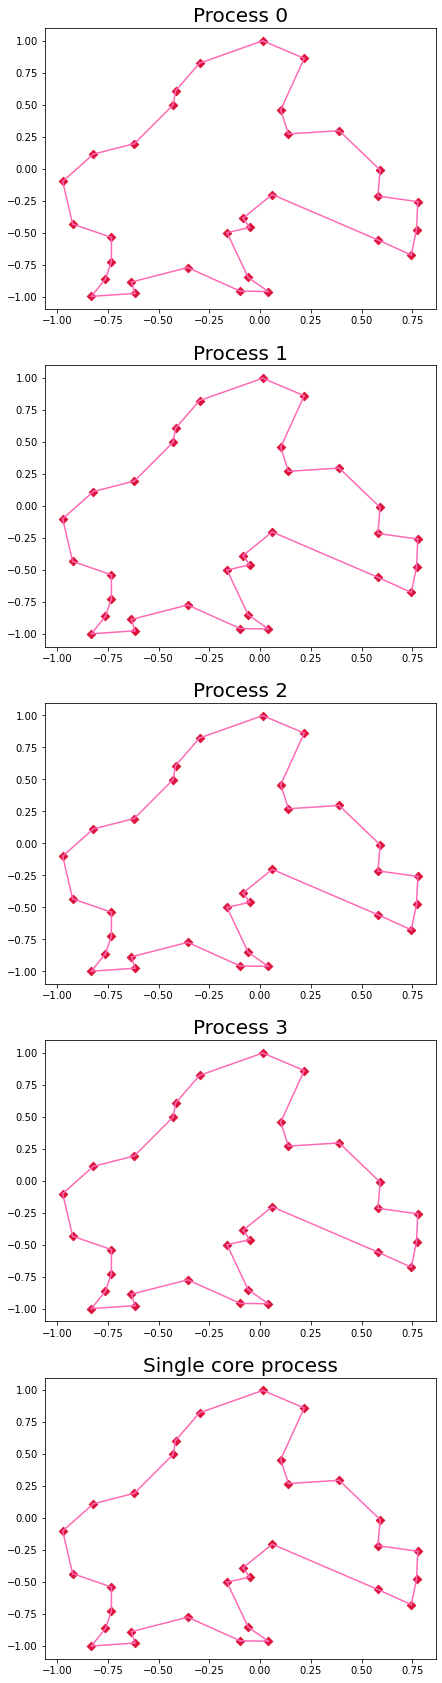

In [33]:
fig, axx = plt.subplots(len(cores), 1, figsize=(7,30))

cities = 32

for core in cores:
    opt_path = np.genfromtxt("10.2/best_cromo"+str(core)+".csv", dtype=int, delimiter=',')[-1]
    ax = axx[core]
    ax.scatter(x=pos_x, y=pos_y, color='crimson', marker='D')
    for i in range(cities):
        x1 = pos_x[opt_path[i-cities*int(i/cities)]-1]
        y1 = pos_y[opt_path[i-cities*int(i/cities)]-1]
        x2 = pos_x[opt_path[i+1-cities*int((i+1)/cities)]-1]
        y2 = pos_y[opt_path[i+1-cities*int((i+1)/cities)]-1]
        #ax.annotate(str(i+1), positions[i])
        ax.plot([x1, x2], [y1, y2], color='hotpink')
    if core == 4:
        label = "Single core process"
    else:
        label = f"Process {core}"
    ax.set_title(label , fontsize = 20)

In [34]:
# plot the best path found by each core
for core in cores:
    opt_path = np.genfromtxt("10.2/best_cromo"+str(core)+".csv", dtype=int, delimiter=',')[-1]
    if core == 4:
        label = "Single core process"
    else:
        label = f"------Process {core}------"
    print( '\n',label, "\nBest path =", opt_path )


 ------Process 0------ 
Best path = [ 1 14 31 30 29 13  2 22  4  8 10 12 17  7 25 21 19 16 26 15  5 27 24 23
  3  9 11 18  6 28 20 32]

 ------Process 1------ 
Best path = [ 1 14 31 30 29 13  2 22  4  8 10 12 17  7 25 21 19 16 26 15  5 27 24 23
  3  9 11 18  6 28 20 32]

 ------Process 2------ 
Best path = [ 1 14 31 30 29 13  2 22  4  8 10 12 17  7 25 21 19 16 26 15  5 27 24 23
  3  9 11 18  6 28 20 32]

 ------Process 3------ 
Best path = [ 1 14 31 30 29 13  2 22  4  8 10 12 17  7 25 21 19 16 26 15  5 27 24 23
  3  9 11 18  6 28 20 32]

 Single core process 
Best path = [ 1 14 31 30 29 13  2 22  4  8 10 12 17  7 25 21 19 16 26 15  5 27 24 23
  3  9 11 18  6 28 20 32]
